# PYTHON PROJECT - DATA VISUALIZATION :
---
## Write a program to visualize the data using various charts like  :

- ### Bar Graph
- ### Scatter Plot
- ### Pie Chart
- ### Histogram
- ### Box Plot
- ### Heat Map
- ### Bubble Chart
- ### Word Cloud, etc.
---

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pandas as pd
import numpy as np

## We will use 'titanic' dataset for data visualization :

In [82]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [89]:
titanic.shape

(891, 15)

In [83]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [88]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [84]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [85]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

# Bar Graph (Passengers by Class) :
- ### generating a bar graph that represents the passenger count on the Titanic, categorized by class (First, Second, and Third).

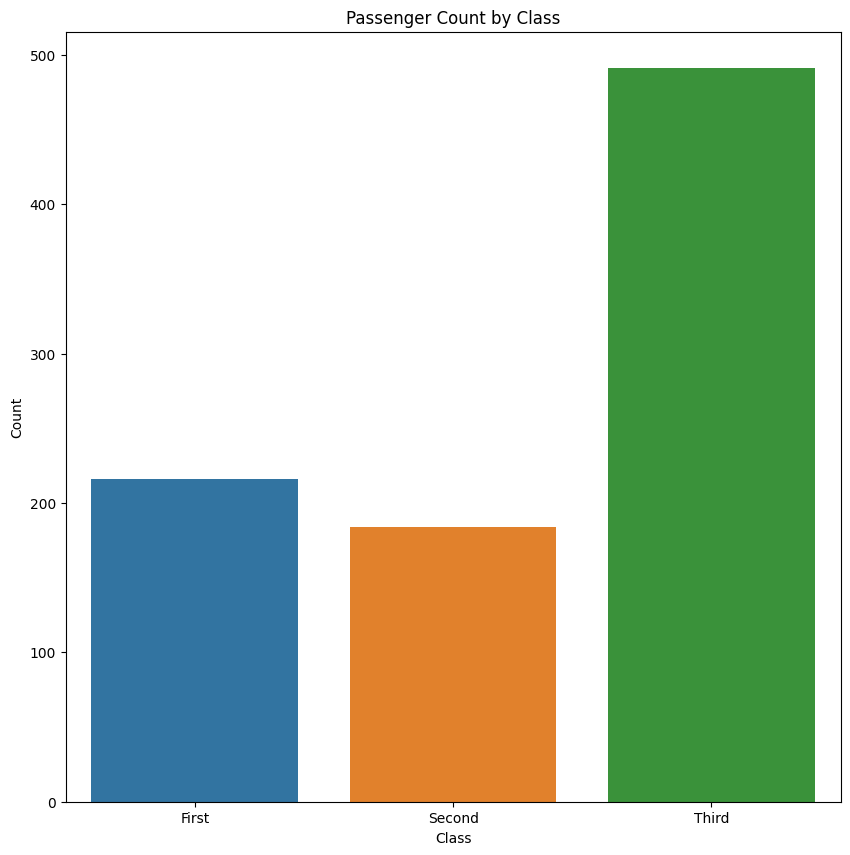

In [62]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'class', data = titanic, hue = 'class')
plt.title('Passenger Count by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### The bar graph shows that the majority of passengers were in third class, followed by first class and then second class. This could suggest that ticket prices for third class were more affordable, leading to a higher number of passengers in that category.
---
# Scatter Plot ('fare' vs 'age') :
- ### This scatter plot visualizes the relationship between age and fare paid by passengers on the Titanic, with the added dimension of sex.

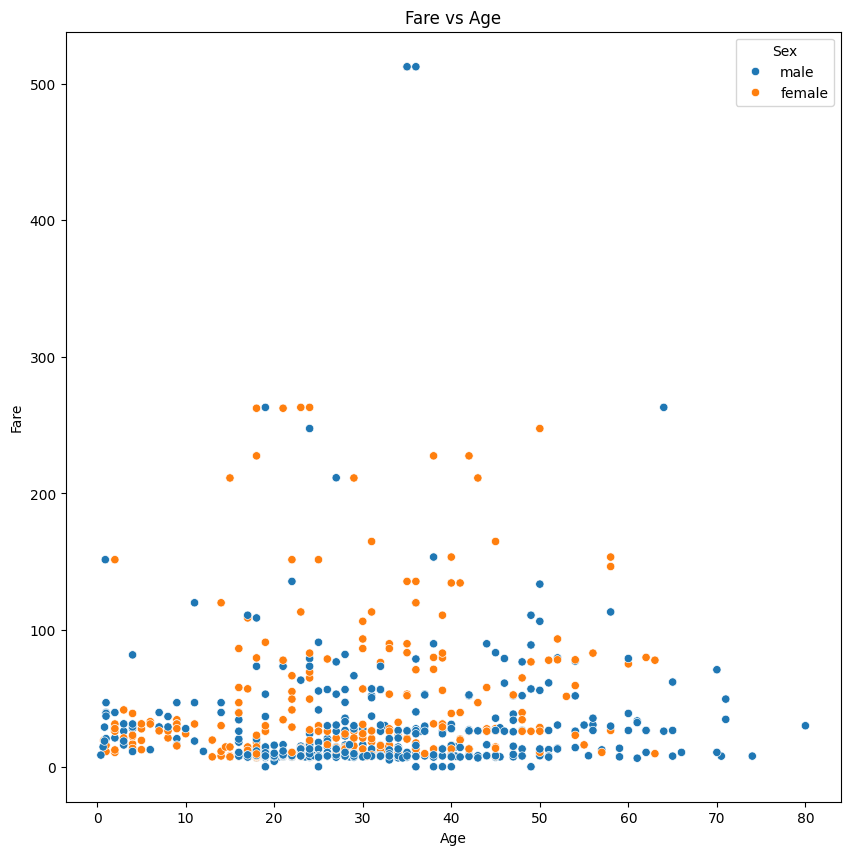

In [63]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'age', y = 'fare', data = titanic, hue = 'sex')
plt.title('Fare vs Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title = 'Sex')
plt.show()

## Here are some insights we can get from this plot :

- ### **Fare Distribution :** Most passengers paid lower fares, with a few outliers paying significantly higher fares (possibly for more luxurious accommodations).
- ### **Age :** There's a wide range of ages among passengers.
- ### **Sex :** There doesn't seem to be a strong correlation between sex and fare. Both males and females are spread across the fare spectrum.
- ### **Outliers :** Some older passengers paid higher fares, which might indicate a preference for more expensive cabins or travel options among some older, wealthier individuals.
- ### **No clear relationship :** There isn't a clear, linear relationship between age and fare. Younger and older passengers both exhibit a range of fares.
---
# Pie Chart (Passenger distribution by Sex) :
- ### Generating a pie chart that visualizes the distribution of passengers on the Titanic by sex (male and female).

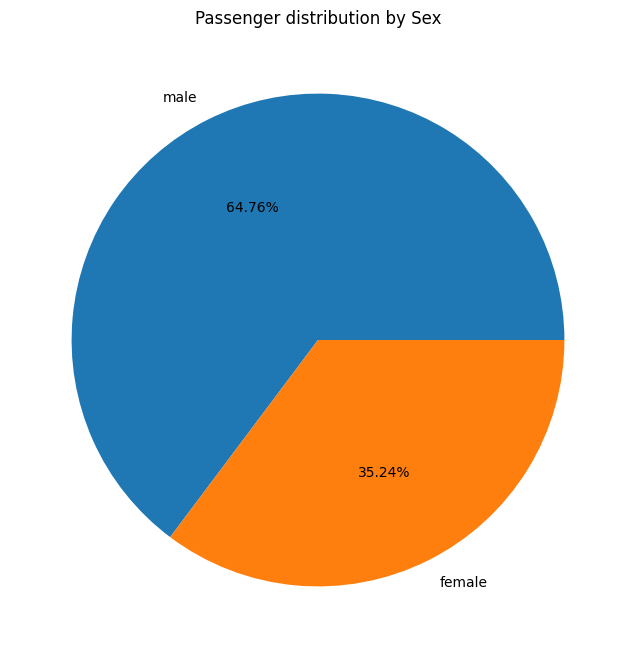

In [64]:
plt.figure(figsize = (8,8))
sizes = titanic['sex'].value_counts()
plt.pie(sizes, labels = sizes.index, autopct = '%.2f%%')
plt.title('Passenger distribution by Sex')
plt.show()

### This confirms that there were significantly more male passengers (64.76%) than female passengers (35.24%) on the Titanic.
- ### **Travel norms :** In the early 20th century, men were more likely to travel for work or immigration purposes.
- ### **Family structure :** Men often traveled alone, while women might have been accompanied by children and therefore less likely to travel independently.
- ### **Social class :** First-class passengers had a higher proportion of women compared to lower classes. This could indicate differences in travel purposes or affordability among different social groups.
### The Titanic's passenger list reflects the broader societal context of the time, where men had greater mobility and were more likely to undertake long-distance journeys.
---
# Histogram (Age Distribution) :
- ### Generating a histogram showing the distribution of ages of passengers on the Titanic.

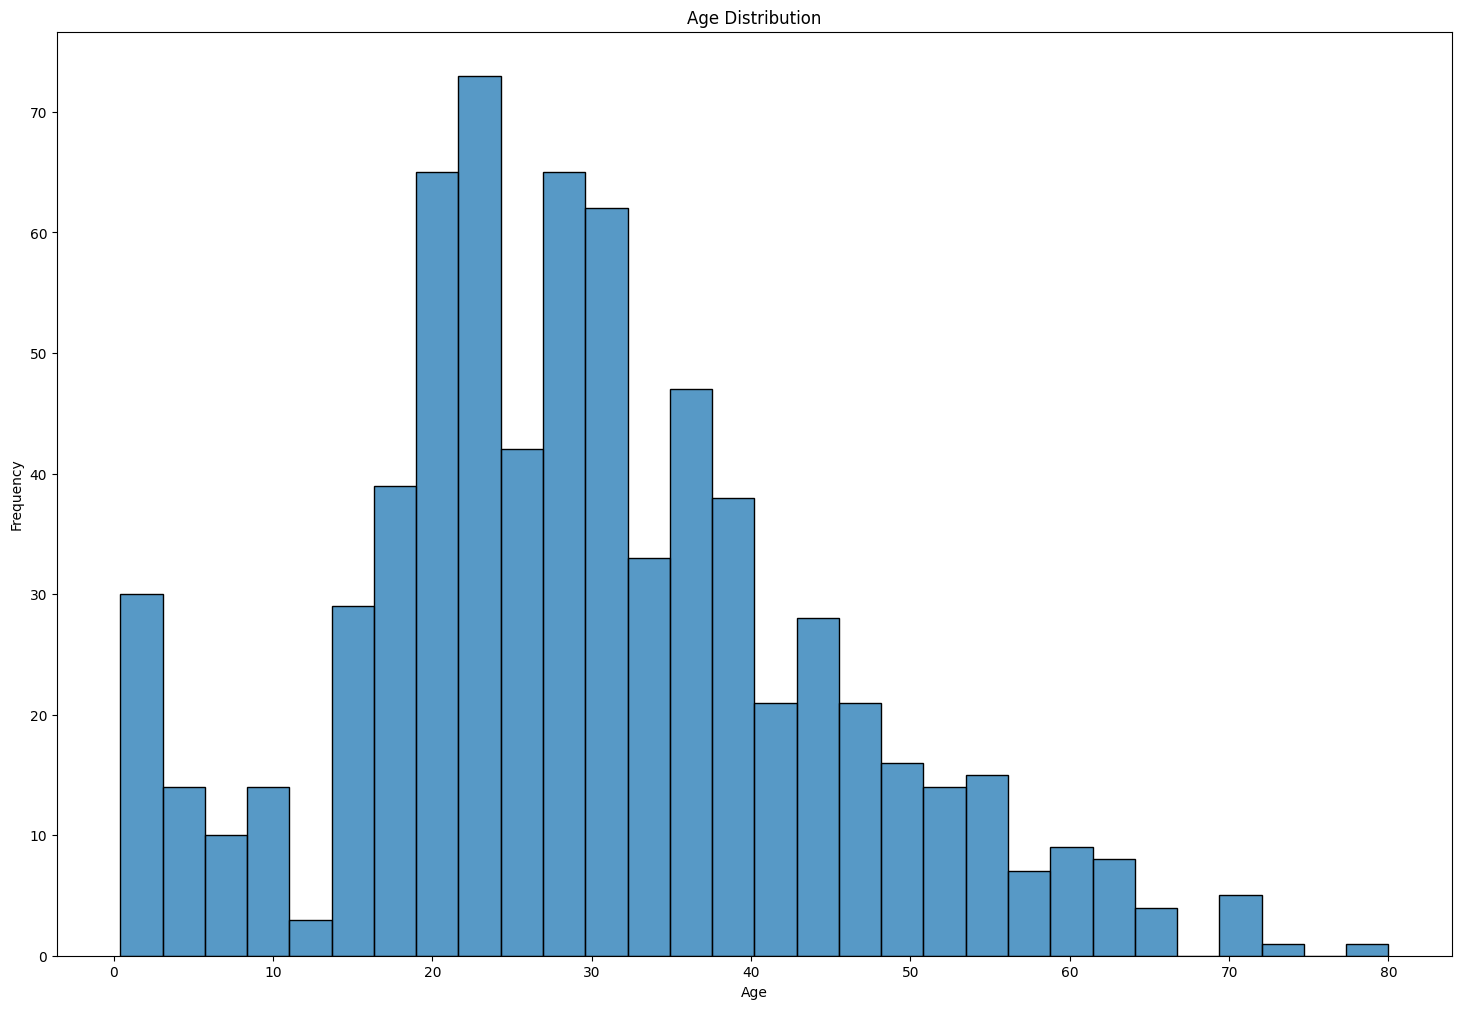

In [65]:
plt.figure(figsize = (18,12))
sns.histplot(titanic['age'].dropna(), bins = 30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### The histogram shows the age distribution of passengers on the Titanic. Here are some insights from the plot:

- ### Most passengers were between **20 and 30 years old**. This is where the histogram peaks.
- ### There were a significant number of **children** as seen in the left side of the distribution.
- ### **Older adults (above 60)** were less common. The distribution tapers off as age increases.
- ### **Infants (age 0-1)** were present on the ship. There is a notable bar at the very beginning of the histogram.
- ### This distribution reflects the demographics of passengers on the Titanic, with a mix of ages but a concentration of **young adults**.
---
# Box Plot (Fare Distribution by Class) :
- ### Generating a box plot that showcases the distribution of fares across different passenger classes on the Titanic.

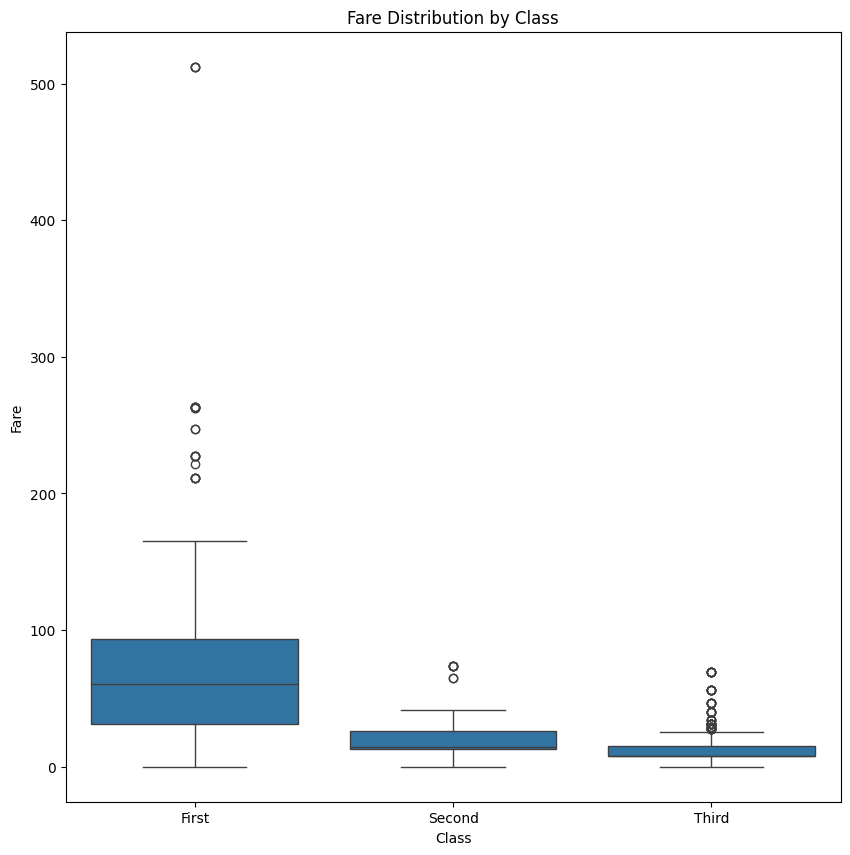

In [66]:
plt.figure(figsize = (10,10))
sns.boxplot(x = 'class', y = 'fare', data = titanic)
plt.title('Fare Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Fare')
plt.show()

### Here are some insights you can get from the box plot:

- ### **Fare Distribution :** The plot clearly shows that First class passengers paid significantly higher fares compared to Second and Third class passengers. The median fare for First class is much higher.
- ### **Outliers :** There are several outliers present in each class, particularly in First class. These outliers represent passengers who paid exceptionally high fares, possibly for more luxurious accommodations or special services.
- ### **Interquartile Range (IQR) :** The IQR (the box's height) is larger for First class, indicating a wider spread of fares within that class. Second and Third class have smaller IQRs, suggesting a more consistent fare range.
- ### **Median :** The median fare (represented by the line inside the box) is highest for First class, followed by Second class, and then Third class. This confirms the general trend of higher fares for higher classes.
- ### **Comparison Across Classes :** The box plot allows for easy comparison of fare distributions across different passenger classes. It highlights the disparities in ticket prices and spending patterns among different socioeconomic groups traveling on the Titanic.
---
# Heat Map (Correlation Matrix) :
- ### Generating a heatmap to visualize the correlation between numerical features in the Titanic dataset.

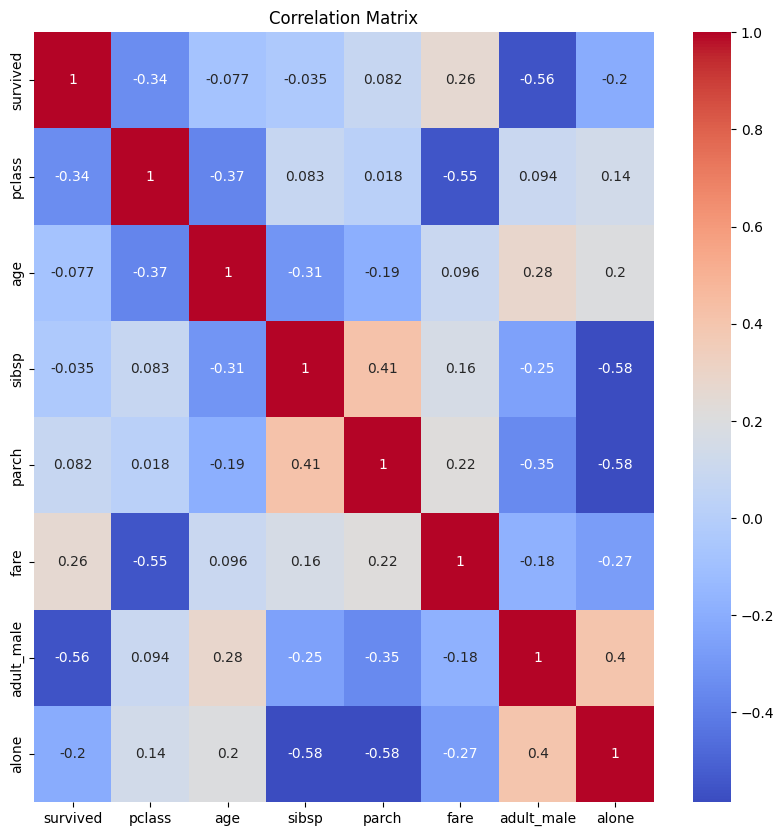

In [87]:
correlation_matrix = titanic.corr(numeric_only = True)
plt.figure(figsize = (10,10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Here are some insights we get from the heatmap :

- ### **Positive Correlation :** fare and survived have a moderate positive correlation (0.26), suggesting that passengers who paid higher fares were more likely to survive. This might be because higher fares corresponded to better cabin locations or access to lifeboats.
- ### **Negative Correlation :** pclass and fare have a strong negative correlation (-0.55), indicating that higher passenger classes were associated with lower fares (First class had higher fares).
- ### **Weak Correlation :** age and sibsp have a weak positive correlation (0.31), suggesting a slight tendency for older passengers to have more siblings or spouses on board.
- ### **No Correlation :** Some features show very weak or no correlation, like parch and age (0.18), indicating that the number of parents/children a passenger had wasn't strongly related to their age.
---
# Bubble Chart (Fare vs Age (Bubble Size: Pclass)) :
- ### Visualizing the relationship between fare and age, with the bubble size representing the passenger class (pclass).


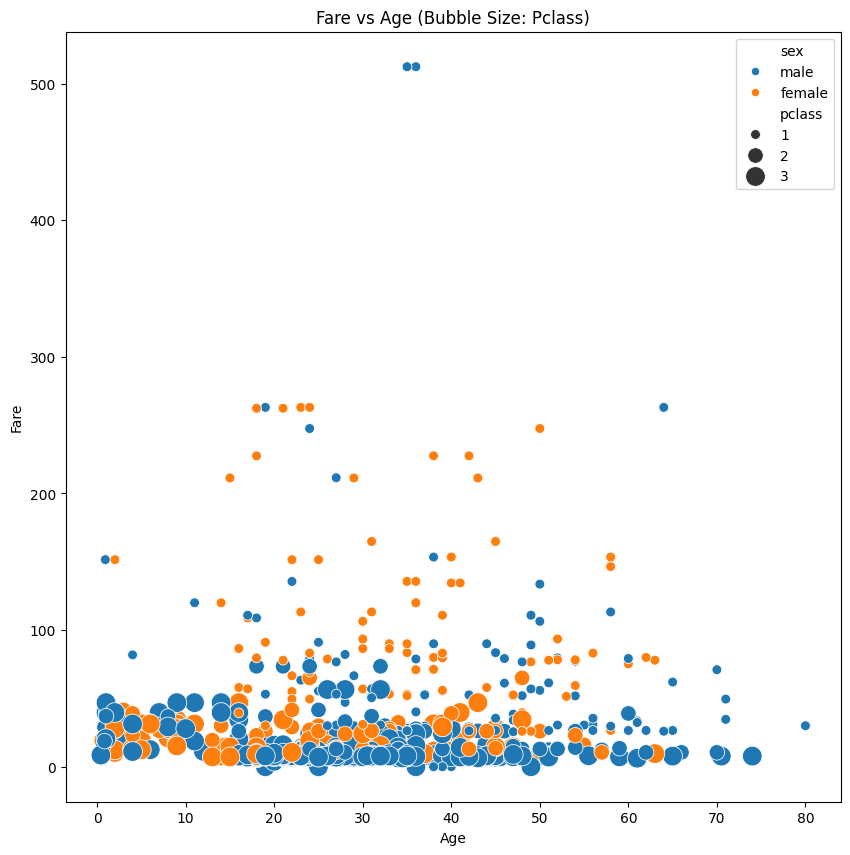

In [90]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='age', y='fare', data=titanic, hue='sex', size='pclass', sizes=(50, 200))
plt.title('Fare vs Age (Bubble Size: Pclass)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Word Cloud (Embark Towns) :
- ### Generating a word cloud from the **'embark_town'** column:

- ### We use **dropna()** to remove missing values before generating the word cloud.

- ### This word cloud visualizes the most common embarkation towns for passengers on the Titanic. The size of each town's name reflects its frequency in the dataset.

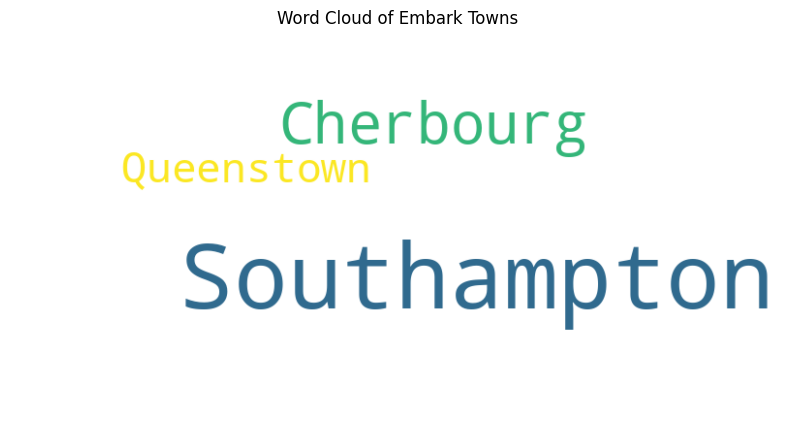

In [93]:
plt.figure(figsize=(10, 10))
text = ' '.join(titanic['embark_town'].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Embark Towns')
plt.show()